In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('preprocessed.csv', index_col = 0)

In [3]:
df.head()


,ax(g),ay(g),az(g),wx(deg/s),wy(deg/s),wz(deg/s),AngleX(deg),AngleY(deg),AngleZ(deg)
rtime,,,,,,,,,
2019-12-06 09:45:00.000,0.9961,0.0146,-0.0034,0.0,0.0,0.0,49.988,-88.781,-177.660
2019-12-06 09:45:00.100,0.9976,0.0176,0.0015,0.0,0.0,0.0,51.993,-88.813,-179.577
2019-12-06 09:45:00.200,1.0059,0.0151,0.0176,0.0,0.0,0.0,51.987,-88.813,-179.478
2019-12-06 09:45:00.300,1.0063,0.0171,0.0137,0.0,0.0,0.0,51.976,-88.808,-179.412
2019-12-06 09:45:00.400,1.0049,0.0171,0.0054,0.0,0.0,0.0,53.481,-88.835,179.149


In [4]:
ax_data = df['ax(g)']

In [5]:
ax_data.head()

rtime
2019-12-06 09:45:00.000    0.9961
2019-12-06 09:45:00.100    0.9976
2019-12-06 09:45:00.200    1.0059
2019-12-06 09:45:00.300    1.0063
2019-12-06 09:45:00.400    1.0049
Name: ax(g), dtype: float64

In [6]:
train_size = int(len(ax_data) * 0.8)

In [7]:
test_size = len(ax_data) - train_size

In [8]:
train, test = ax_data[0:train_size], ax_data[train_size:len(df)]

In [9]:
train.head()

rtime
2019-12-06 09:45:00.000    0.9961
2019-12-06 09:45:00.100    0.9976
2019-12-06 09:45:00.200    1.0059
2019-12-06 09:45:00.300    1.0063
2019-12-06 09:45:00.400    1.0049
Name: ax(g), dtype: float64

In [10]:
print(len(train), len(test))

1630688 407673


In [11]:
def create_dataset(dataset,look_back=1):
    Xs, ys = [], []
    dataset = np.array(dataset)
    for i in range(len(dataset) - look_back - 1):
        v= dataset[i:(i + look_back)]
        Xs.append(v)
        ys.append(dataset[(i + look_back)])
    return np.array(Xs), np.array(ys)

In [12]:
look_back = 10

In [13]:
train.shape

(1630688,)

In [14]:
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

print(X_train.shape, y_train.shape)

(1630677, 10) (1630677,)


In [15]:
# X_train[1:5]
X_test[1:5]

array([[1.0054, 1.0015, 1.001 , 1.    , 1.0024, 1.0029, 0.9985, 1.    ,
        0.9961, 0.9976],
       [1.0015, 1.001 , 1.    , 1.0024, 1.0029, 0.9985, 1.    , 0.9961,
        0.9976, 0.9995],
       [1.001 , 1.    , 1.0024, 1.0029, 0.9985, 1.    , 0.9961, 0.9976,
        0.9995, 1.    ],
       [1.    , 1.0024, 1.0029, 0.9985, 1.    , 0.9961, 0.9976, 0.9995,
        1.    , 1.0005]])

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [17]:
X_train[-5:]

array([[[1.001 , 1.002 , 1.0039, 1.0024, 1.0049, 1.0068, 0.9995, 1.0039,
         1.002 , 1.001 ]],

       [[1.002 , 1.0039, 1.0024, 1.0049, 1.0068, 0.9995, 1.0039, 1.002 ,
         1.001 , 1.0068]],

       [[1.0039, 1.0024, 1.0049, 1.0068, 0.9995, 1.0039, 1.002 , 1.001 ,
         1.0068, 1.    ]],

       [[1.0024, 1.0049, 1.0068, 0.9995, 1.0039, 1.002 , 1.001 , 1.0068,
         1.    , 1.0054]],

       [[1.0049, 1.0068, 0.9995, 1.0039, 1.002 , 1.001 , 1.0068, 1.    ,
         1.0054, 1.0044]]])

# **Modelling Using LSTM**

In [18]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units = 128, input_shape = (1,look_back)))


In [19]:
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error',optimizer=keras.optimizers.Adam(0.001))
model.fit(X_train[1:1000], y_train[1:1000], epochs = 1, batch_size=1, verbose=2)

Train on 999 samples
999/999 - 8s - loss: 0.0071


In [20]:
train_predict = model.predict(X_train[1:10000])
test_predict = model.predict(X_test[1:10000])


In [21]:
print('Train Mean Absolute Error:', keras.losses.MAE(y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(keras.losses.MSE(y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', keras.losses.MAE(y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(keras.losses.MSE(y_test[0], test_predict[:,0])))

Train Mean Absolute Error: tf.Tensor(0.0033242095, shape=(), dtype=float32)
Train Root Mean Squared Error: 0.003443502
Test Mean Absolute Error: tf.Tensor(0.0014868005, shape=(), dtype=float32)
Test Root Mean Squared Error: 0.0017503308


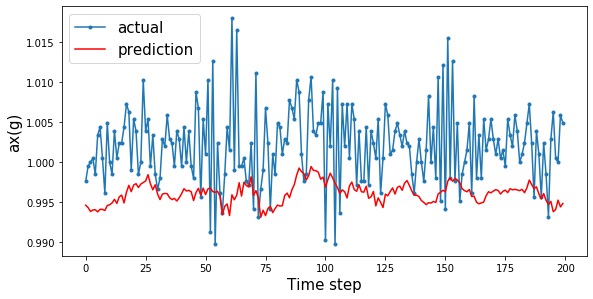

In [22]:
aa=[x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test[:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
plt.subplots_adjust(left=0.07)
plt.ylabel('ax(g)', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();